# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.648449e+01     1.365771e+01
 * time: 0.0016219615936279297
     1     3.607223e+01     1.021535e+01
 * time: 0.004626035690307617
     2     2.450512e+01     3.699415e+00
 * time: 0.01134800910949707
     3     2.316245e+01     5.588959e+00
 * time: 0.015945911407470703
     4     2.169583e+01     3.520160e+00
 * time: 0.020313024520874023
     5     2.058498e+01     2.976309e+00
 * time: 0.02542400360107422
     6     1.941164e+01     2.041147e+00
 * time: 0.030658960342407227
     7     1.908748e+01     2.486558e+00
 * time: 0.03523993492126465
     8     1.881466e+01     1.917762e+00
 * time: 0.0396881103515625
     9     1.838258e+01     1.201572e+00
 * time: 0.044023990631103516
    10     1.811862e+01     1.113629e+00
 * time: 0.04831695556640625
    11     1.794309e+01     1.071419e+00
 * time: 0.052824974060058594
    12     1.779408e+01     5.633579e-01
 * time: 0.05709505081176758
    13     1.771170e+01     5.680162e-01
 

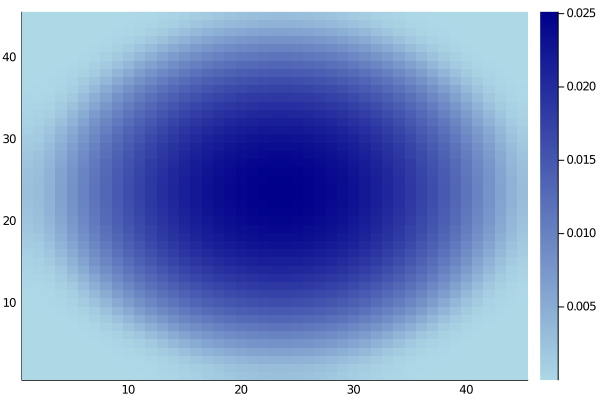

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)